# Scatter Plot of The Relationship between Heart Rate and Power while Running

In [2]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import panel as pn
from hvplot.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

pn.extension()

In [5]:
df_run = pd.read_csv('./csv/df_run.csv')
df_fitted = pd.read_csv('./csv/df_fitted.csv')

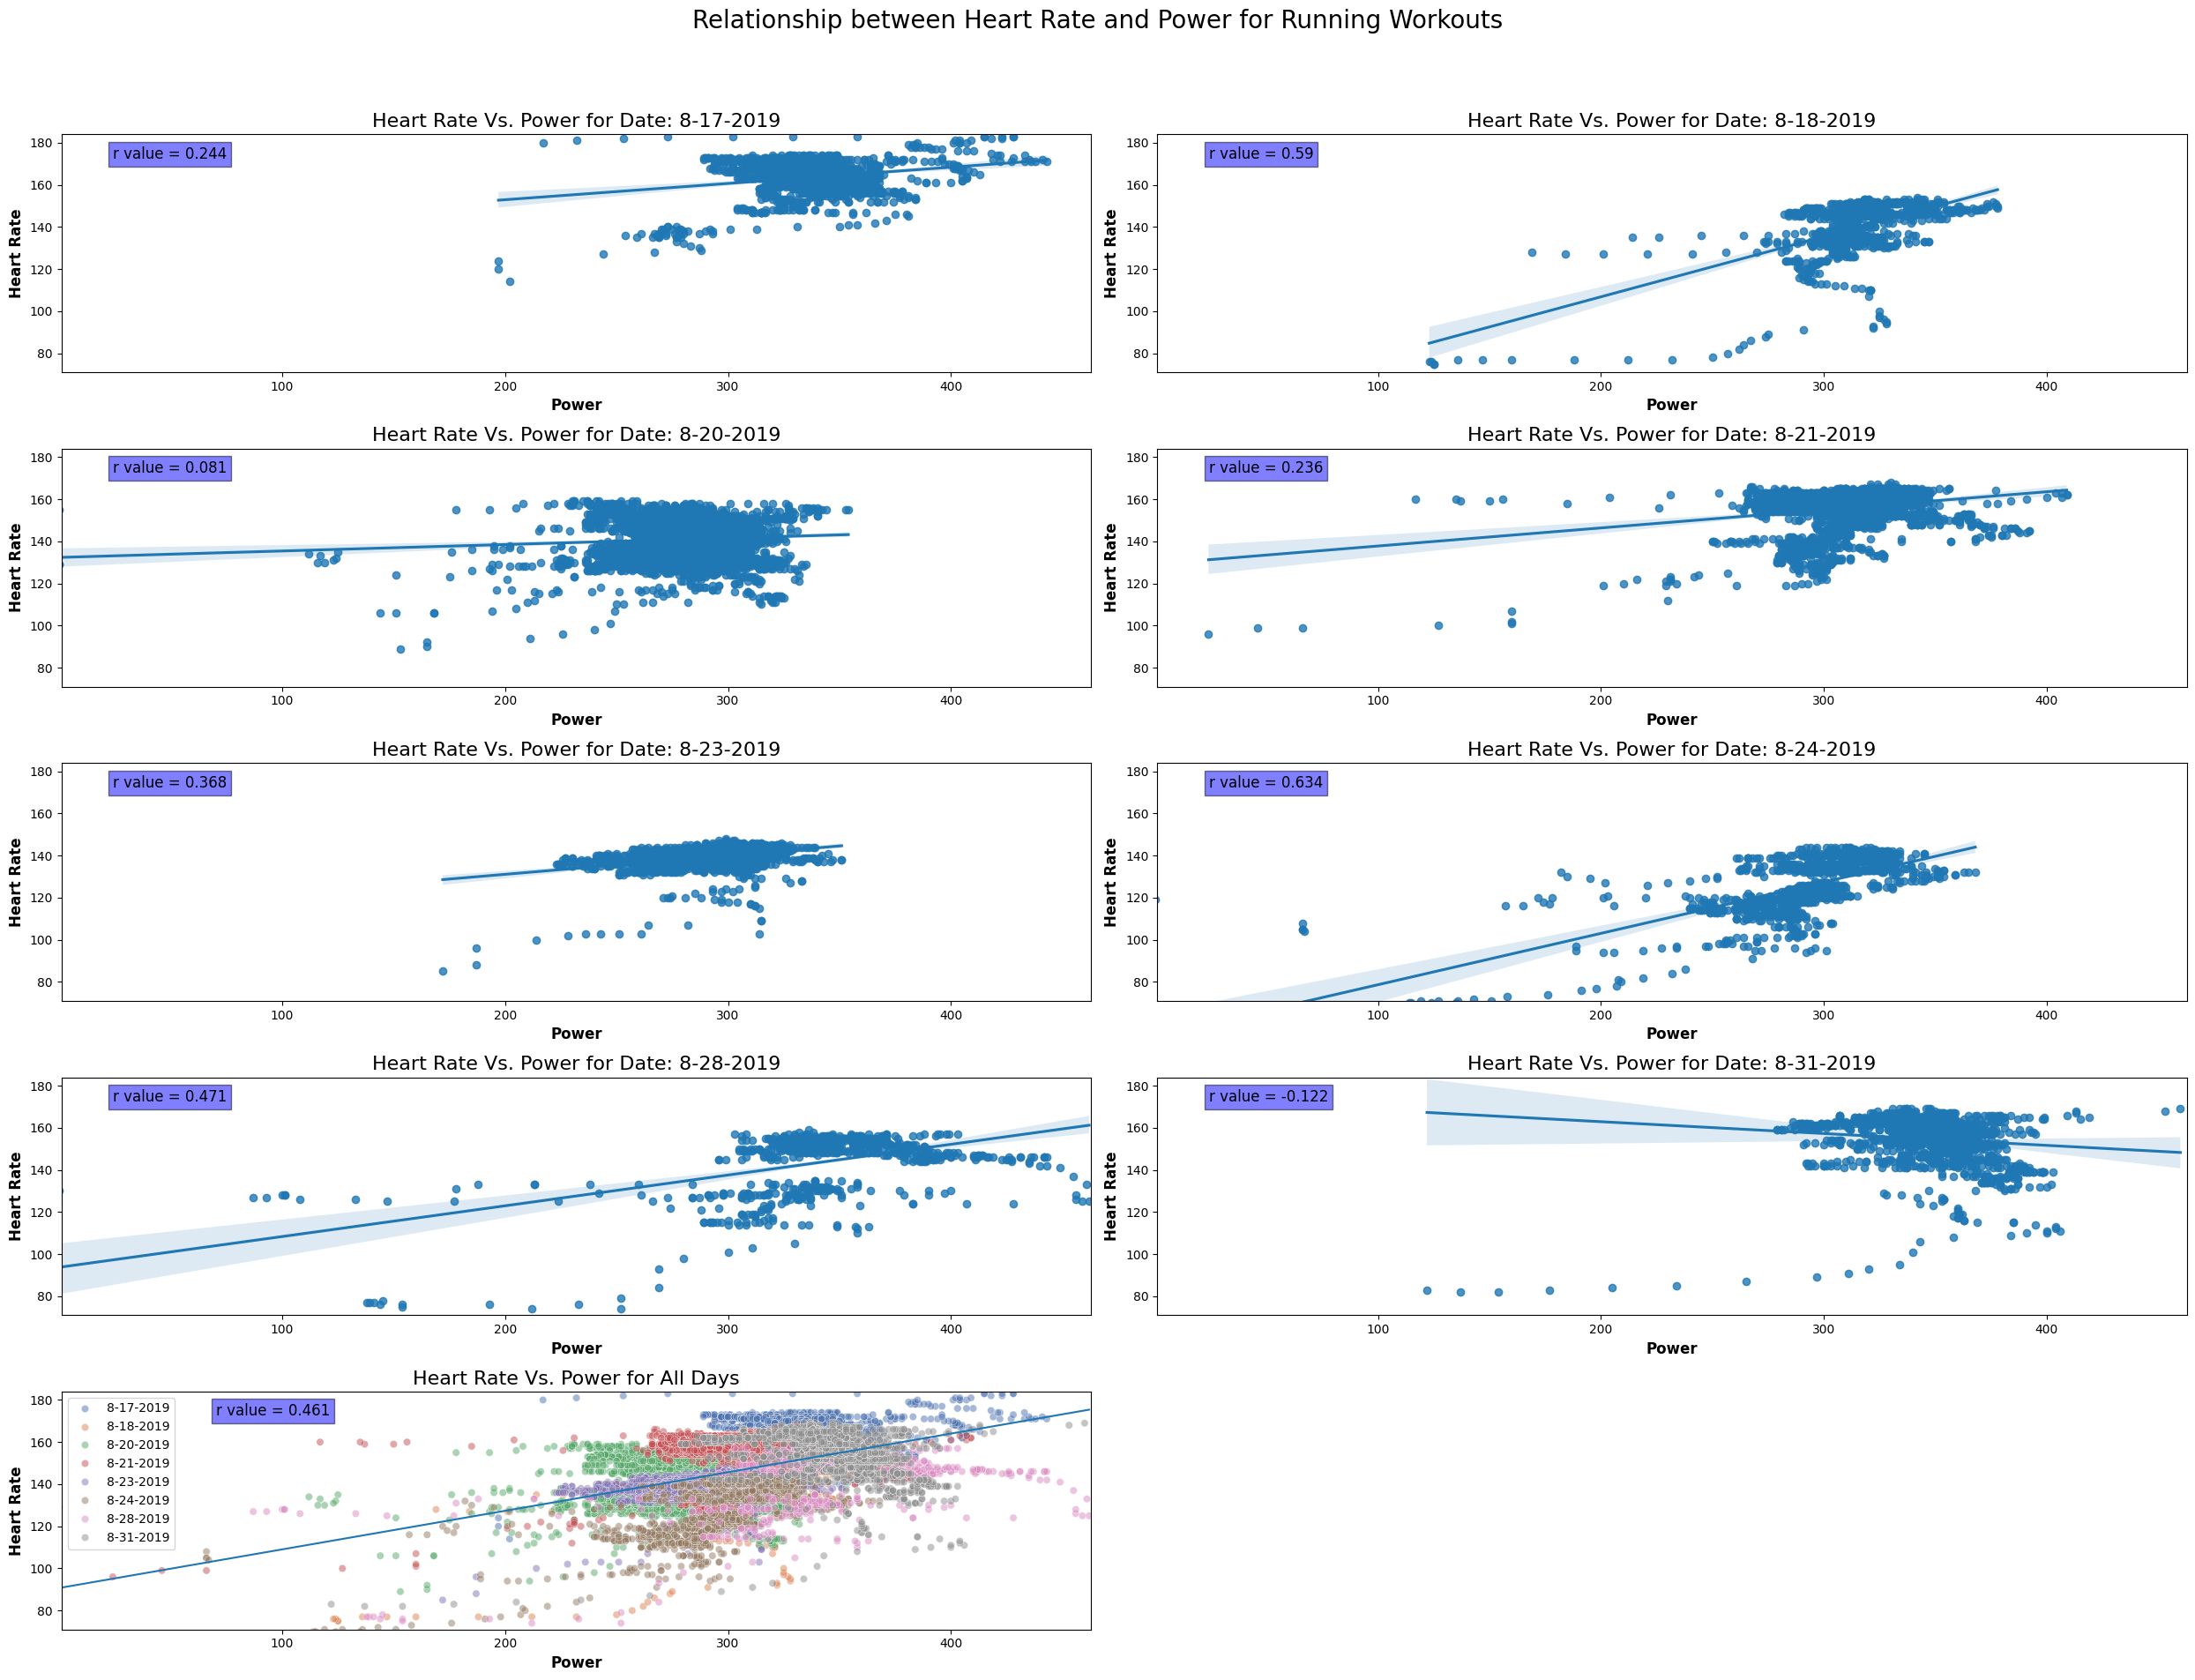

In [37]:
fig = plt.figure(figsize=(25,20))
text_box_props = dict(boxstyle='square', facecolor='blue', alpha=0.5)

global_min_x = df_run['Power'].min()
global_max_x = df_run['Power'].max()
global_min_y = df_run['heart_rate'].min()
global_max_y = df_run['heart_rate'].max()

count = 1
for group, data in df_run.groupby('date'):
    ax = fig.add_subplot(5, 2, count)
    ax.set_xlim(global_min_x+1, global_max_x+1)
    ax.set_ylim(global_min_y+1, global_max_y+1)
    sns.regplot(data=data, x='Power', y='heart_rate', ax=ax)
    ax.set_ylabel('Heart Rate', fontweight='bold', fontsize=12)
    ax.set_xlabel('Power', fontweight='bold', fontsize=12)
    ax.set_title('Heart Rate Vs. Power for Date: ' + str(group), fontsize=16)
    r,p = pearsonr(data['Power'], data['heart_rate'])
    ax.text(0.05, 0.95, 'r value = ' + str(round(r,3)), transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=text_box_props)
    count += 1

ax2 = fig.add_subplot(5, 2, count)
r_all,p_all = pearsonr(df_run['Power'], df_run['heart_rate'])

sns.scatterplot(data=df_run, x='Power', y='heart_rate', hue='date', palette='deep', alpha=0.5, ax=ax2)
ax2.set_ylabel('Heart Rate', fontweight='bold', fontsize=12)
ax2.set_xlabel('Power', fontweight='bold', fontsize=12)
ax2.set_xlim(global_min_x+1, global_max_x+1)
ax2.set_ylim(global_min_y+1, global_max_y+1)
ax2.text(0.15, 0.95, 'r value = ' + str(round(r_all,3)), transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=text_box_props)
count += 1

sns.lineplot(data=df_fitted, x='x', y='y', ax=ax2)

fig.suptitle('Relationship between Heart Rate and Power for Running Workouts', fontsize=20)

plt.title('Heart Rate Vs. Power for All Days', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()